# Double Pendulum Project

We want to solve the differential equation for a double pendulum using different Runge-Kutta (RK) methods. Unlike a single pendulum, the double pendulum system has four co-ordinates of interest: the angular position and velocity of each pendulum $(\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2)$. There is a differential equation for each pendulum and each is coupled to the other, so the RK method used in lecture will have to be extended to handle two coupled functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Runge-Kutta Solvers

Below is a general list of parameters needed for RK methods of order 1 (Euler's method) through 4. In our implementation of the double pendulum solution, the $x$ terms represent the time variable $t$.

|RK Order|  <img width=200/>$y_{i+1}$                   | <img width=200/> $z_{i+1}$                   |
|:------:|:---------------------------------------------|:---------------------------------------------|
|1       | $y_i + k_1$                                  | $z_i + l_1$                                  |
|2       | $y_i + k_2$                                  | $z_i + l_2$                                  |
|3       | $y_i + \frac{1}{6}(k_1 + 4k_2 + k_3)$        | $z_i + \frac{1}{6}(l_1 + 4l_2 + l_3)$        |
|4       | $y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$ | $z_i + \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4)$ |

where 

|$n$| <img width=200/> $k_n$ | <img width=200/> $l_n$ |
|:-:|:-----------------------|:-----------------------|
|1  | $hf(x_n, y_n, z_n)$    | $hg(x_n, y_n, z_n)$    |
|2  | $hf(x_n + \tfrac{h}{2}, y_n + \tfrac{k_1}{2}, z_n + \tfrac{l_1}{2})$ | $hg(x_n + \tfrac{h}{2}, y_n + \tfrac{k_1}{2}, z_n + \tfrac{l_1}{2})$ |
|3  | $hf(x_n + \tfrac{h}{2}, y_n + \tfrac{k_2}{2}, z_n + \tfrac{l_2}{2})$ | $hg(x_n + \tfrac{h}{2}, y_n + \tfrac{k_2}{2}, z_n + \tfrac{l_2}{2})$ |
|4  | $hf(x_n + h, y_n + k_3, z_n + l_3)$ | $hg(x_n + h, y_n + k_3, z_n + l_3)$ |

The cell below defines functions implementing the above RK methods.

In [2]:
def RK1(funcs, y_0, z_0, t, args={}):
    """
    1st-Order Runge-Kutta approximation (AKA Euler's method) to a first-order ODE system
    with initial conditions.

    Args:
        funcs: (callables)  List of the first-order ODE system to be approximated.
        y_0:   (array)      The initial condition of the y-variables.
        z_0:   (array)      The initial condition of the z-variables.
        t:     (array)      A sequence of time points for which to solve for y,z.
        args:  (dict)       Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the y-system at each point in t,
                         with the initial value y_0 in the first row.
        z:    (array)    The approximated solution of the z-system at each point in t,
                         with the initial value z_0 in the first row.
    """
    
    # Initialise the approximation arrays
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0

    # Loop through the time steps, approximating this step from the prev step
    for i, t_i in enumerate(t[:-1]):

        h = t[i+1] - t_i # size of the step

        k_1 = h*funcs[0](t_i, y[i], z[i], args)
        l_1 = h*funcs[1](t_i, y[i], z[i], args)
        
        # Euler (RK1) steps
        y[i+1] = y[i] + k_1
        z[i+1] = z[i] + l_1

    return [y,z]



def RK2(funcs, y_0, z_0, t, args={}):
    """
    2nd Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i, y[i], z[i], args)
        l_1 = h*funcs[1](t_i, y[i], z[i], args)
        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2., z[i] + l_1/2., args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2., z[i] + l_1/2., args)

        # RK2 steps
        y[i+1] = y[i] + k_2
        z[i+1] = z[i] + l_2

    return [y,z]



def RK3(funcs, y_0, z_0, t, args={}):
    """
    3rd Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i        , y[i]          , z[i]          , args)
        l_1 = h*funcs[1](t_i        , y[i]          , z[i]          , args)

        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        
        k_3 = h*funcs[0](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        l_3 = h*funcs[1](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        
        # RK3 steps
        y[i+1] = y[i] + 1/6.*(k_1 + 4.*k_2 + k_3)
        z[i+1] = z[i] + 1/6.*(l_1 + 4.*l_2 + l_3)

    return [y,z]



def RK4(funcs, y_0, z_0, t, args={}):
    """
    4th Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i        , y[i]          , z[i]          , args)
        l_1 = h*funcs[1](t_i        , y[i]          , z[i]          , args)

        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        
        k_3 = h*funcs[0](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        l_3 = h*funcs[1](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)

        k_4 = h*funcs[0](t_i + h    , y[i] + k_3    , z[i] + l_3    , args)
        l_4 = h*funcs[1](t_i + h    , y[i] + k_3    , z[i] + l_3    , args)
        
        # RK4 steps
        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4)
        z[i+1] = z[i] + 1/6.*(l_1 + 2.*l_2 + 2.*l_3 + l_4)

    return [y,z]

## The Double Pendulum Problem

The differential equations for a double pendulum are:

\begin{equation}
    \dot{\theta}_1 = \omega_1    
\end{equation}

\begin{equation}
    \dot{\theta}_2 = \omega_2
\end{equation}

\begin{equation}
    \dot{\omega}_1 = \frac{-g(2m_1 + m_2)\sin{\theta_1} - m_2g\sin(\theta_1 - 2\theta_2) - 2\sin(\theta_1 - \theta_2)m_2[\omega_2^2L_2 + \omega_1^2L_1\cos(\theta_1 - \theta_2)]}{L_1\big[2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2)\big]}
\end{equation}

\begin{equation}
    \dot{\omega}_2 = \frac{2\sin(\theta_1 - \theta_2)\big[\omega_1^2L_1(m_1 + m_2) + g(m_1 + m_2)\cos{\theta_1} + \omega_2^2L_2m_2\cos(\theta_1 - \theta_2)\big]}{L_2\big[2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2)\big]}
\end{equation}

We can recast even more explicitly in the language of Runge-Kutta - i.e. in terms of $y$ and $z$. With the following definitions
$$
\begin{align}
    y_0 = \theta_1, \quad y_1 \equiv \dot{y}_0 = \omega_1, \quad y_2 \equiv \dot{y}_1 = \dot{\omega_1},  \\
    z_0 = \theta_2, \quad z_1 \equiv \dot{z}_0 = \omega_2, \quad z_2 \equiv \dot{z}_1 = \dot{\omega_2},
\end{align}
$$
we get the following RK system:

\begin{equation}
    y_1 = \omega_1    
\end{equation}

\begin{equation}
    z_1 = \omega_2
\end{equation}

\begin{equation}
    y_2 = \frac{-g(2m_1 + m_2)\sin(y_0) - m_2g\sin(y_0 - 2z_0) - 2\sin(y_0 - z_0)m_2[z_1^2L_2 + y_1^2L_1\cos(y_0 - z_0)]}{L_1\big[2m_1 + m_2 - m_2\cos(2y_0 - 2z_0)\big]}
\end{equation}

\begin{equation}
    z_2 = 2\sin(y_0 - z_0)\cdot\frac{\big[y_1^2L_1(m_1 + m_2) + g(m_1 + m_2)\cos(y_0) + z_1^2L_2m_2\cos(y_0 - z_0)\big]}{L_2\big[2m_1 + m_2 - m_2\cos(2y_0 - 2z_0)\big]}
\end{equation}



These equations are implemented in functional form in the cell below as the `doublePendulum(t, y, z, args)` function. It inputs `t`, a list of time sampling points; `y` and `z`, the initial conditions for the $y$ and $z$ variables, respectively; and `C`, a dictionary of constants used in expressions for $y_2$ and $z_2$.

In [3]:
def innerPendulum(t, y, z, args):
    """
    A double pendulum, described as set of two first-order ODEs.
    
    Args:
        t: list of time sampling points
        y: Inner pendulum initial state vector [angle, angular velocity] 
        z: Outer pendulum initial state vector [angle, angular velocity]
        args: Dictionary of constants
                args['g'] : local acceleration due to gravity
                args['L1']: length of the inner pendulum
                args['L2']: length of the outer pendulum
                args['m1']: mass of the inner pendulum
                args['m2']: mass of the outer pendulum

    Returns:
        dydt: ODE vector for y
        dzdt: ODE vector for z
    """
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    dydt = np.zeros(2, dtype = np.float64)
    
    dydt[0] = y[1]
    
    # It's a long equation – construct term-by-term:
    numerator   = -g * (2*m1 + m2) * np.sin(y[0])
    numerator  += -m2 * g * np.sin(y[0] - 2*z[0])
    numerator  += -2 * np.sin(y[0] - z[0]) * m2 *( (z[1]**2)*L2 + (y[1]**2)*L1*np.cos(y[0] - z[0]) )
    denominator = L1 * ( 2*m1 + m2 - m2*np.cos( 2*(y[0] - z[0]) ) )
    
    dydt[1] = numerator / denominator

    return dydt


def outerPendulum(t, y, z, args):
    """
    A double pendulum, described as set of two first-order ODEs.
    
    Args:
        t: list of time sampling points
        y: Inner pendulum initial state vector [angle, angular velocity] 
        z: Outer pendulum initial state vector [angle, angular velocity]
        args: Dictionary of constants
                args['g'] : local acceleration due to gravity
                args['L1']: length of the inner pendulum
                args['L2']: length of the outer pendulum
                args['m1']: mass of the inner pendulum
                args['m2']: mass of the outer pendulum

    Returns:
        dydt: ODE vector for y
        dzdt: ODE vector for z
    """
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    dzdt = np.zeros(2, dtype = np.float64)

    dzdt[0] = z[1]
    
    
    prefactor    = 2 * np.sin(y[0] - z[0])
    numerator    = (y[1]**2) * L1 * (m1+m2)
    numerator   += g * (m1 + m2) * np.cos(y[0])
    numerator   += (z[1]**2) * L2 * m2 * np.cos(y[0] - z[0])
    denominator  = L2 * ( 2*m1 + m2 - m2*np.cos( 2*(y[0] - z[0]) ) )
    
    dzdt[1] = prefactor * numerator / denominator
    
    return dzdt

## Energy Calculation

The potential and kinetic energies of a double pendulum are given by
$$
\begin{align}
U &= m_1gy_1 + m_2gy_2\\
T &=  \frac{1}{2}m_1(\dot{x}_1^2 + \dot{y}_1^2)
    + \frac{1}{2}m_2(\dot{x}_2^2 + \dot{y}_2^2).
\end{align}
$$
To transform this into our state-space parameters ($\theta_1, \omega_1, \theta_2, \omega_2$), we use the geometric relationships:
$$
\begin{align}
x_1 &= L_1\sin{\theta_1},\\
x_2 &= L_1\sin{\theta_1} + L_2\sin{\theta_2},\\
y_1 &= -L_1\cos{\theta_1},\\
y_2 &= -L_1\cos{\theta_1} - L_2\cos{\theta_2}.
\end{align}
$$
We can quickly transform the potential energy expression:
$$
U(\theta_1,\theta_2) = -g\big[ (m_1+m_2)L_1\cos{\theta_1} + m_2L_2\cos{\theta_2}\big].
$$
The kinetic energy expression is more complicated. The first step is to evaluate the time derivatives $\dot{x_1},\dot{x_2},\dot{y_1},\dot{y_2}$ from the expressions above:
$$
\begin{align}
\dot{x_1} &= L_1\omega_1\cos{\theta_1},\\
\dot{x_2} &= L_1\omega_1\cos{\theta_1} + L_2\omega_2\cos{\theta_2},\\
\dot{y_1} &= L_1\omega_1\sin{\theta_1},\\
\dot{y_2} &= L_1\omega_1\sin{\theta_1} + L_2\omega_2\sin{\theta_2}.
\end{align}
$$
Squaring these, plugging them into the expression for $T$, and using the trigonometric identity $\sin^2{\theta} + \cos^2{\theta} = 1$ gives:
$$
T(\theta_1,\theta_2,\omega_1,\omega_2) = m_1L_1^2\omega_1^2 + \frac{1}{2}m_2\Big[ L_1^2\omega_1^2 + L_2^2\omega_2^2 + 2L_1L_2\omega_1\omega_2(\sin{\theta_1}\sin{\theta_2} + \cos{\theta_1}\cos{\theta_2}) \Big].
$$
If we now use the trigonometric identities $\sin(u)\sin(v) = \frac{1}{2}\big[\cos(u-v)-\cos(u+v)\big]$ and $\cos(u)\cos(v) = \frac{1}{2}\big[\cos(u-v)+\cos(u+v)\big]$, we get a slightly simpler expression:
$$
T(\theta_1,\theta_2,\omega_1,\omega_2) = m_1L_1^2\omega_1^2 + \frac{1}{2}m_2\Big[ L_1^2\omega_1^2 + L_2^2\omega_2^2 + 2L_1L_2\omega_1\omega_2\cos(\theta_1-\theta_2) \Big].
$$

Finally, we get the following two expressions for the energies of a double pendulum:
$$
\boxed{
\begin{align}
U(\theta_1,\theta_2) &= -g\big[ (m_1+m_2)L_1\cos{\theta_1} + m_2L_2\cos{\theta_2}\big]\\
T(\theta_1,\theta_2,\omega_1,\omega_2) &= m_1L_1^2\omega_1^2 + \frac{1}{2}m_2\Big[ L_1^2\omega_1^2 + L_2^2\omega_2^2 + 2L_1L_2\omega_1\omega_2\cos(\theta_1-\theta_2) \Big].
\end{align}
}
$$

In [94]:
def getEnergy(theta_1, omega_1, theta_2, omega_2, args):
    '''
    Returns the mechanical, kinetic, and
    potential energy of a state in phase space.
    '''
    g  = args['g'];
    L1 = args['L1']; L2 = args['L2'];
    m1 = args['m1']; m2 = args['m2']
    
#     y1 = -L1 * np.cos(theta_1)
#     y2 = y1 - ( L2 * np.cos(theta_2) )
    
#     xdot1 = L1 * omega_1 * np.cos(theta_1)
#     xdot2 = xdot1 + ( L2 * omega_2 * np.cos(theta_2) )
#     ydot1 = L1 * omega_1 * np.sin(theta_1)
#     ydot2 = ydot1 + ( L2 * omega_2 * np.sin(theta_2) )    
    
#     U = g * ( m1*y1 + m2*y2 )
    
#     T = ( m1*(xdot1**2 + ydot1**2) + m2*(xdot2**2 + ydot2**2) ) / 2

    U = -g * ( (m1+m2)*L1*np.cos(theta_1) + m2*L2*np.cos(theta_2) )
    T = 0.5*m1*(L1*omega_1)**2 + 0.5*m2*( (L1*omega_1)**2 + (L2*omega_2)**2 + 2*L1*L2*omega_1*omega_2*np.cos(theta_1-theta_2) )
        
    return [T + U, T, U]

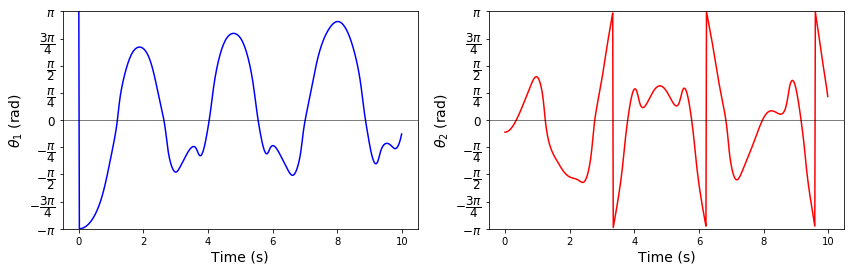

In [165]:
def wrap_rad(theta):
    ''' Wraps the input in radians onto the interval (-pi,pi]. '''
    return ( ( (-theta + np.pi) % (2*np.pi) ) - np.pi ) * -1


def plotTrajectories(t, theta_1, theta_2, figsize = None):
    '''
    Plots the trajectories theta_1(t), theta_2(t)
    '''
    if figsize is None:
        fig = plt.figure(figsize = (14,4))
    else:
        fig = plt.figure(figsize = figsize)

    # Plot Angle 1
    ax1 = plt.subplot(121)
    ax1.plot(t, wrap_rad(theta_1), 'b-')
    ax1.axhline(0, c = 'k', lw = 0.5)
    ax1.set_xlabel('Time (s)', fontsize = 14)
    ax1.set_ylabel('$\\theta_1$ (rad)', fontsize = 14)
    locs = np.arange(-np.pi, np.pi + np.pi/4, np.pi/4)
    labels = ['$-\\pi$', '$-\\dfrac{3\\pi}{4}$', '$-\\dfrac{\\pi}{2}$', '$-\\dfrac{\\pi}{4}$',
              '$0$', '$\\dfrac{\\pi}{4}$', '$\\dfrac{\\pi}{2}$', '$\\dfrac{3\\pi}{4}$', '$\\pi$']
    ax1.set_yticks(locs)
    ax1.set_yticklabels(labels)
    ax1.yaxis.set_tick_params(labelsize=12)
    ax1.set_ylim([-np.pi,np.pi])
    
    ax2 = plt.subplot(122)
    ax2.plot(t, wrap_rad(theta_2), 'r-')
    ax2.axhline(0, c = 'k', lw = 0.5)
    ax2.set_xlabel('Time (s)', fontsize = 14)
    ax2.set_ylabel('$\\theta_2$ (rad)', fontsize = 14)
    ax2.set_yticks(locs)
    ax2.set_yticklabels(labels)
    ax2.yaxis.set_tick_params(labelsize=12)
    ax2.set_ylim([-np.pi,np.pi])

    plt.show()
plotTrajectories(t, y[:,0], z[:,0])

In [191]:
### Parameters

solve_args       = {}
solve_args['g']  = 9.80665  # [m/s^2]
solve_args['L1'] = 1.       # [m]
solve_args['L2'] = 1.       # [m]
solve_args['m1'] = 1.       # [kg]
solve_args['m2'] = 1.       # [kg]

n_samples = 600
dt        = 1./60

initial_ang_1 = 180 * np.pi/180.  # [rad]: initial theta_1
initial_ang_2 = 20 * np.pi/180.  # [rad]: initial theta_2

initial_ang_vel_1 = 0.         # [rad/s]: initial omega_1 
initial_ang_vel_2 = 0.         # [rad/s]: initial omega_2


t = np.arange(0, n_samples*dt, dt) # [s]: array of time steps
y_0 = np.array([initial_ang_1, initial_ang_vel_1])
z_0 = np.array([initial_ang_2, initial_ang_vel_2])

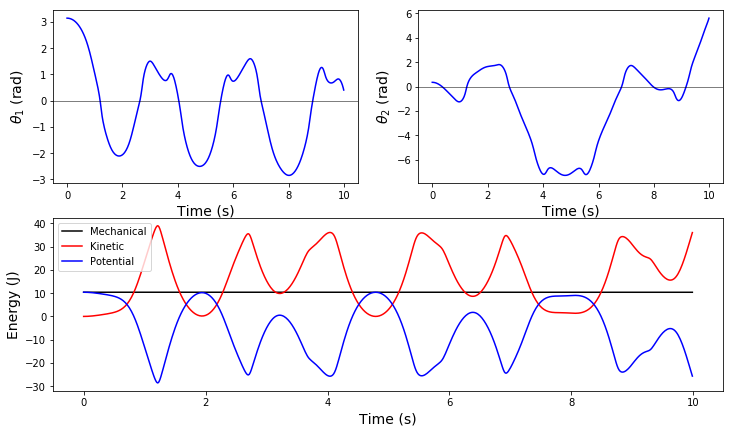

In [192]:
# Solve the double pendulum ODE using RK
doublePendulum = (innerPendulum, outerPendulum)
y, z = RK4(doublePendulum, y_0, z_0, t, solve_args)

# Calculate the energies at each timestep
E, T, U = getEnergy(y[:,0], y[:,1], z[:,0], z[:,1], solve_args)

fig = plt.figure(figsize = (12,7))

# Plot Angle 1
ax_1 = plt.subplot2grid((2,2),(0,0))
ax_1.plot(t, y[:,0], c='b')
ax_1.axhline(0, c = 'k', lw = 0.5)
ax_1.set_xlabel('Time (s)', fontsize = 14)
ax_1.set_ylabel('$\\theta_1$ (rad)', fontsize = 14)

# Plot Angle 2
ax_2 = plt.subplot2grid((2,2),(0,1))
ax_2.plot(t, z[:,0], c='b')
ax_2.axhline(0, c = 'k', lw = 0.5)
ax_2.set_xlabel('Time (s)', fontsize = 14)
ax_2.set_ylabel('$\\theta_2$ (rad)', fontsize = 14)

# Plot Energies
ax_3 = plt.subplot2grid((2,2),(1,0), colspan = 2)
ax_3.plot(t, E, 'k-', label = 'Mechanical')
ax_3.plot(t, T, 'r-', label = 'Kinetic')
ax_3.plot(t, U, 'b-', label = 'Potential')
ax_3.legend()
ax_3.set_xlabel('Time (s)', fontsize = 14)
ax_3.set_ylabel('Energy (J)', fontsize = 14)
plt.show()

### Some plotting and animation tools

In [193]:
def plot_pendulum_frame(theta_1, theta_2, args, figsize = (6,6)):
    '''
    Plot a single snapshot of the double-pendulum state
    '''
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    # Convert to Cartesian co-ordinates
    x_inner = L1*np.sin(theta_1)
    y_inner = -L1*np.cos(theta_1)
    x_outer = x_inner + L2*np.sin(theta_2)
    y_outer = y_inner - L2*np.cos(theta_2)
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure(figsize = figsize)
    ax = plt.axes( xlim = ( -(L1+L2), L1+L2 ), ylim = ( -(L1+L2), L1+L2 ) )
    
    # Plot
    ax.plot(x_inner, y_inner, 'b.', markersize = 15)    # inner mass
    ax.plot([0,x_inner], [0,y_inner], 'k-')             # inner rod
    ax.plot(x_outer, y_outer, 'b.', markersize = 15)    # outer mass
    ax.plot([x_inner,x_outer], [y_inner,y_outer], 'k-') # outer rod

In [194]:
from matplotlib import rc
rc('animation', html='html5')    # Allows animation object to be displayed inline

def animateDoublePendulum(t,theta_1,theta_2,dt,args):
    
    from matplotlib import animation

    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    # Convert to Cartesian co-ordinates
    x_inner = L1*np.sin(theta_1)
    y_inner = -L1*np.cos(theta_1)
    x_outer = x_inner + L2*np.sin(theta_2)
    y_outer = y_inner - L2*np.cos(theta_2)

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax  = fig.add_subplot(111, aspect = 'equal', autoscale_on = False,
                          xlim = ( -(L1+L2), (L1+L2) ),
                          ylim = ( -(L1+L2), (L1+L2) ))
    ax.grid()
    line, = ax.plot([], [], 'o-', lw = 2)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x_vals = [0., x_inner[i], x_outer[i]]
        y_vals = [0., y_inner[i], y_outer[i]]
        line.set_data(x_vals, y_vals)
        return line,

    # choose the interval based on dt and the time to animate one step
    from time import time
    t0 = time()
    animate(0)
    t1 = time()
    interval = 1000 * dt - (t1 - t0)
    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func = init,
                                   frames = len(t), interval = interval, blit = True)
    
    return anim

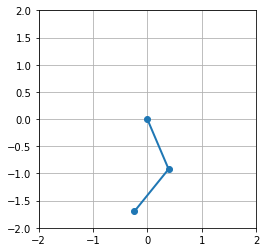

In [195]:
from IPython.display import HTML

anim = animateDoublePendulum(t, y[:,0], z[:,0], dt, solve_args)    # Obtain the animation object
HTML(anim.to_html5_video())    # Shows the animation inline

# anim.save('double_pendulum_animation.mp4', fps = int(1/dt), extra_args = ['-vcodec', 'libx264'])    # Save anim in current directory

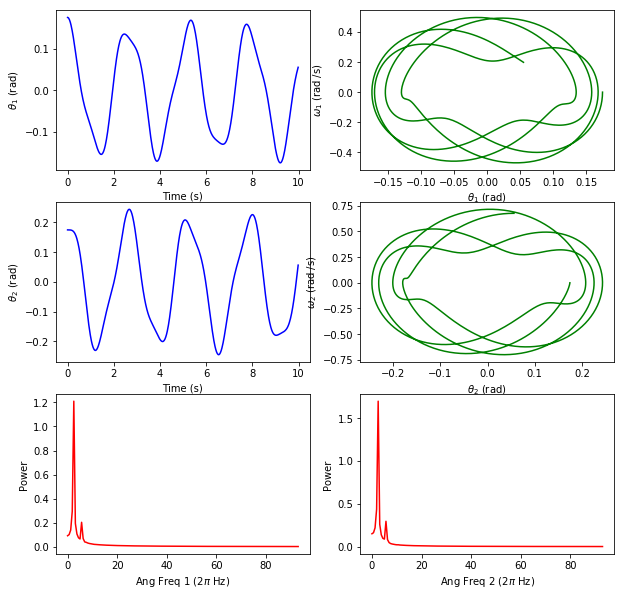

In [88]:
def plot_pendulum_analysis(t,y,z,figsize = None):
    """ Plot Angle, Phase Diagram, FFT. """
    
    if figsize is None:
        fig = plt.figure()
    else:
        fig = plt.figure(figsize = figsize)

    # Plot Angle 1
    ax_1 = fig.add_subplot(321)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Time (s)')
    ax_1.set_ylabel('$\\theta_1$ (rad)')

    # Plot Phase Diagram 1
    ax_3 = fig.add_subplot(322)
    ax_3.plot(y[:,0], y[:,1], c='g')
    ax_3.set_xlabel('$\\theta_1$ (rad)')
    ax_3.set_ylabel('$\\omega_1$ (rad /s)')

    # Plot Angle 2
    ax_2 = fig.add_subplot(323)
    ax_2.plot(t, z[:,0], c='b')
    ax_2.set_xlabel('Time (s)')
    ax_2.set_ylabel('$\\theta_2$ (rad)')
    
    # Plot Phase Diagram 2
    ax_4 = fig.add_subplot(324)
    ax_4.plot(z[:,0], z[:,1], c='g')
    ax_4.set_xlabel('$\\theta_2$ (rad)')
    ax_4.set_ylabel('$\\omega_2$ (rad /s)')
    
    # Fourier Transforms
    f_fft = np.fft.fftfreq(len(t), t[1]-t[0])
    y_fft = np.fft.fft(y[:,0])/np.sqrt(2*len(t))
    z_fft = np.fft.fft(z[:,0])/np.sqrt(2*len(t))
    N = int( len(f_fft)/2 - 1 )
    
    # Plot Power Spectrum 1
    ax_5 = fig.add_subplot(325)
    ax_5.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_5.set_xlabel('Ang Freq 1 ($2 \pi$ Hz)')
    ax_5.set_ylabel('Power')
    
    # Plot Power Spectrum 2
    ax_6 = fig.add_subplot(326)
    ax_6.plot(f_fft[:int(N/2)]*2*np.pi, abs(z_fft[:int(N/2)]), c='r')
    ax_6.set_xlabel('Ang Freq 2 ($2 \pi$ Hz)')
    ax_6.set_ylabel('Power')

plot_pendulum_analysis(t,y,z, figsize = (10,10))

# Analysis Sections

The following sections use the functions defined above to analyze the double pendulum system. Two approaches are taken:
1. Comparison of integrator accuracies
1. Exploration of the system's physics


## 1. Integrator Analysis

We want to test how our choice of integrator and sampling frequency affect the time-evolution of the double pendulum.

### 1.1. Comparison of Runge-Kutta Orders

To compare the performance of the Runge-Kutta integrators, we need an appropriate quantity to track across pendulum simulations for each integrator. One way is to run multiple pendulum simulations with very slightly different initial conditions and compare the results. The idea behind this is that coarser/worse integrators will exacerbate the chaotic behavior of the double pendulum and produce divergent results very quickly, whereas more refined integrators would reduce this deviation to levels expected for a chaotic system. A step-by-step plan for this is as follows:

1. Prepare a set of initial conditions $(\theta_1, \omega_1, \theta_2, \omega_2)$, the seed.
1. Slightly perturb the seed initial conditions and separately save the result.
1. Repeat step 2 many times for different (but still small) perturbations. This initializes our sample of pendula.
1. Time-evolve each pendulum (read: set of initial conditions) using an RK integrator to be tested.
1. At each time $t$, evaluate a test statistic (e.g. the standard deviation $\sigma(t)$) over $\theta(t)$ for all trajectories.
1. Plot the deviation as a function of time.
1. Repeat for other integrators and compare deviation plots.

In doing this, we should carefully consider the system's energy. In order to minimize the contribution of chaos, we implement the process above for low-energy systems where the behavior is more regular.

Now to implement some functions to make this simpler. `getPerturbations()` will take a seed set of initial conditions and output perturbed sets, and `getDeviationStat()` will take an array of trajectories and a test-statistic callable of our choosing and return the test-statistic evaluated at each timestep.

In [345]:
def getPerturbations(theta0, omega0, d_theta, d_omega, n_pert):
    '''
    Returns an array of symmetric pertubations
    on a set of initial conditions [theta0, omega0].
    Args:
        theta_0 (float): initial angle
        omega_0 (float): initial angular velocity
        d_theta (float): angular perturbation per step
        d_omega (float): angular velocity perturbation per step
        n_pert    (int): number of pertubation steps
    Returns:
        perturbations (ndarray): [ [init], [init+pert], [init+2*pert], ... ]
    '''
    pert = np.array([d_theta, d_omega])
    init_cond = np.array([theta0, omega0])
    perturbations = np.zeros((n_pert+1,2))

    for i,n in enumerate(range(-int(n_pert/2),int(n_pert/2)+1)):
        perturbations[i] = init_cond + n*pert
    
    return perturbations

print(getPerturbations(0, 0, 0.1, 0, 4))

[[-0.2  0. ]
 [-0.1  0. ]
 [ 0.   0. ]
 [ 0.1  0. ]
 [ 0.2  0. ]]


In [346]:
def getDeviationStat(trajectories, test_stat):
    '''
    Given a set of trajectories, returns a test-statistic
    evaluated over positions at each time.
    Args:
        trajectories (ndarray): array of trajectories (rows) over time (columns).
        test_stat   (callable): arbitrary test-statistic function
    Returns:
        stat (ndarray): test-statistic evaluated at each timestep.
    '''
    n_traj = len(trajectories)
    n_steps = len(trajectories[0])
    
    stat = [None] * n_steps
    for t in range(n_steps):
        stat[t] = test_stat(trajectories[:,t])
    return stat

Now we can set up some seed conditions, get their perturbations, time-evolve (with an integrator of our choice), and quantify divergence (with a test statistic of our choosing).

In [365]:
## Physical pendulum parameters
solve_args       = {}
solve_args['g']  = 9.80665  # [m/s^2]
solve_args['L1'] = 1.       # [m]
solve_args['L2'] = 1.       # [m]
solve_args['m1'] = 1.       # [kg]
solve_args['m2'] = 1.       # [kg]

## Time-sampling parameters
n_samples = 1001
dt        = 1./60
t         = np.arange(0, n_samples*dt, dt)  # [s]: array of time steps

## Initial conditions
theta0_1 = 60 * np.pi/180.   # [rad]: initial theta_1
theta0_2 = 0. * np.pi/180.   # [rad]: initial theta_2
omega0_1 = 0.                # [rad/s]: initial omega_1 
omega0_2 = 0.                # [rad/s]: initial omega_2
y_0 = np.array([theta0_1, omega0_1])
z_0 = np.array([theta0_2, omega0_2])

## Integrator comparison parameters
d_theta_1 = 1e-3   # angular perturbation - top pendulum
d_omega_1 = 0      # angular velocity perturbation - top pendulum
d_theta_2 = 0      # angular perturbation - bottom pendulum
d_omega_2 = 0      # angular velocity perturbation - bottom pendulum
n_pert  = 10      # number of perturbations to consider

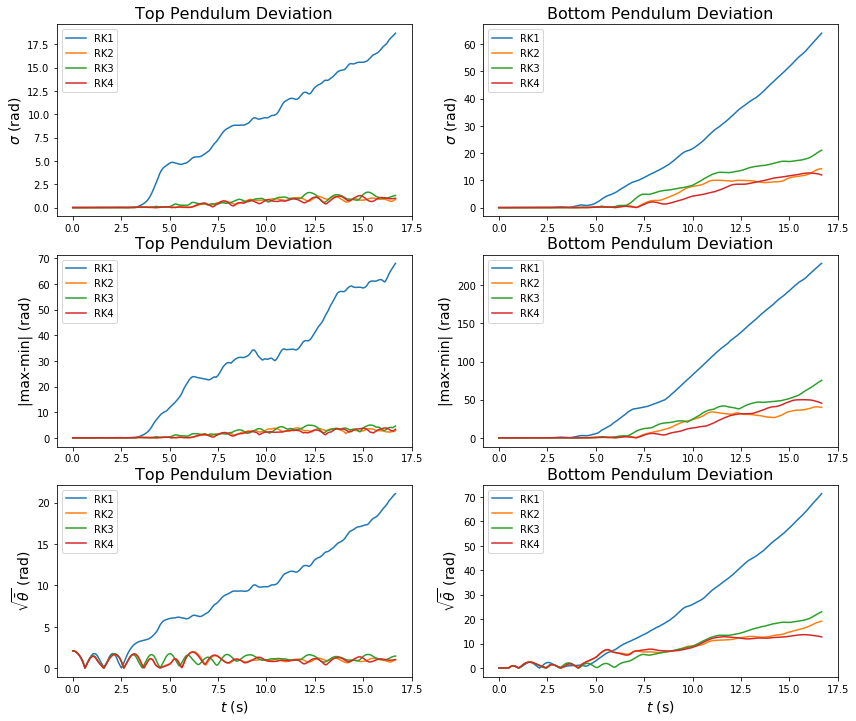

In [368]:
# Double pendulum ODE
doublePendulum = (innerPendulum, outerPendulum)

# List of integrator function handles
integrators = [RK1, RK2, RK3, RK4]
intg_names  = ['RK1','RK2', 'RK3', 'RK4']

# List of perturbations
perturbations_1 = getPerturbations(theta0_1, omega0_1, d_theta_1, d_omega_1, n_pert)
perturbations_2 = getPerturbations(theta0_2, omega0_2, d_theta_2, d_omega_2, n_pert)

# Prepare plots
fig = plt.figure(figsize = (14,12))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Loop over integrators
for intg in range(len(integrators)):
    
    integrate = integrators[intg]  # get the integrator handle
    theta_1_list = np.zeros((n_pert+1, n_samples))     # list of top pendulum trajectories over time
    theta_2_list = np.zeros((n_pert+1, n_samples))     # list of bottom pendulum trajectories over time    
    
    # Loop over pendula
    for i_pend in range(n_pert+1):
        
        pert_1 = perturbations_1[i_pend]
        pert_2 = perturbations_2[i_pend]
        
        y, z = integrate(doublePendulum, y_0 + pert_1, z_0 + pert_2, t, solve_args)

        # Each row of theta_1_list is a trajectory of a single pendulum
        theta_1_list[i_pend] = y[:,0]
        theta_2_list[i_pend] = z[:,0]

    # Now that we have trajectories, evaluate test-statistics
    std_1 = getDeviationStat(theta_1_list, np.std)
    std_2 = getDeviationStat(theta_2_list, np.std)
    maxmin_1 = getDeviationStat(theta_1_list, lambda x: abs(max(x) - min(x)) )
    maxmin_2 = getDeviationStat(theta_2_list, lambda x: abs(max(x) - min(x)) )
    rms_1 = getDeviationStat(theta_1_list, lambda x: np.sqrt(np.mean(x**2)) )
    rms_2 = getDeviationStat(theta_2_list, lambda x: np.sqrt(np.mean(x**2)) )
    
    # Plotting
    ax1.plot(t, std_1, label = intg_names[intg])
#     ax1.set_xlabel('$t$ (s)', fontsize = 14)
    ax1.set_ylabel('$\\sigma$ (rad)', fontsize = 14)
    ax1.set_title('Top Pendulum Deviation', fontsize = 16)
    ax1.legend()
    
    ax2.plot(t, std_2, label = intg_names[intg])
#     ax2.set_xlabel('$t$ (s)', fontsize = 14)
    ax2.set_ylabel('$\\sigma$ (rad)', fontsize = 14)
    ax2.set_title('Bottom Pendulum Deviation', fontsize = 16)
    ax2.legend()
    
    ax3.plot(t, maxmin_1, label = intg_names[intg])
#     ax3.set_xlabel('$t$ (s)', fontsize = 14)
    ax3.set_ylabel('|max-min| (rad)', fontsize = 14)
    ax3.set_title('Top Pendulum Deviation', fontsize = 16)
    ax3.legend()

    ax4.plot(t, maxmin_2, label = intg_names[intg])
#     ax4.set_xlabel('$t$ (s)', fontsize = 14)
    ax4.set_ylabel('|max-min| (rad)', fontsize = 14)
    ax4.set_title('Bottom Pendulum Deviation', fontsize = 16)
    ax4.legend()
    
    ax5.plot(t, rms_1, label = intg_names[intg])
    ax5.set_xlabel('$t$ (s)', fontsize = 14)
    ax5.set_ylabel('$\\sqrt{\\bar{\\theta}}$ (rad)', fontsize = 14)
    ax5.set_title('Top Pendulum Deviation', fontsize = 16)
    ax5.legend()

    ax6.plot(t, rms_2, label = intg_names[intg])
    ax6.set_xlabel('$t$ (s)', fontsize = 14)
    ax6.set_ylabel('$\\sqrt{\\bar{\\theta}}$ (rad)', fontsize = 14)
    ax6.set_title('Bottom Pendulum Deviation', fontsize = 16)
    ax6.legend()
    

plt.show()

Welp, this doesn't seem to behave entireley the way we expected. RK1 exhibits the most deviation by all of the above metrics ($\sigma$, |max - min|, and rms), but there is no strong enough distinction between the higher-order RK methods to come to any conclusions.

Below we try a simpler, and more intuitive method to assess the fidelity of an integrator: checking if it conserves energy. Below, we track the mechanical energy of several pendula over a long period of time. Specifically, we plot the fractional deviation of the mechanical energy from its initial value: $|\Delta{E}/E_0|$

In [443]:
## Physical pendulum parameters
solve_args       = {}
solve_args['g']  = 9.80665  # [m/s^2]
solve_args['L1'] = 1.       # [m]
solve_args['L2'] = 1.       # [m]
solve_args['m1'] = 1.       # [kg]
solve_args['m2'] = 1.       # [kg]

## Time-sampling parameters
n_samples = 300
dt        = 1./30
t         = np.arange(0, n_samples*dt, dt)  # [s]: array of time steps

## Initial conditions
theta0_1 = 60 * np.pi/180.   # [rad]: initial theta_1
theta0_2 = 0. * np.pi/180.   # [rad]: initial theta_2
omega0_1 = 0.                # [rad/s]: initial omega_1 
omega0_2 = 0.                # [rad/s]: initial omega_2
y_0 = np.array([theta0_1, omega0_1])
z_0 = np.array([theta0_2, omega0_2])

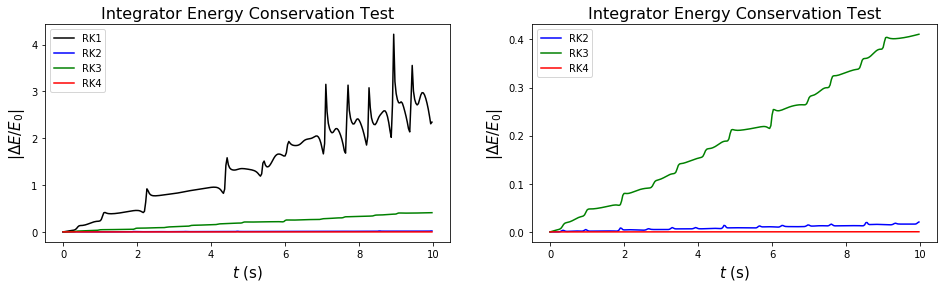

In [444]:
# Double pendulum ODE
doublePendulum = (innerPendulum, outerPendulum)

# List of integrator function handles
integrators = [RK1, RK2, RK3, RK4]
intg_names  = ['RK1','RK2', 'RK3', 'RK4']

# Prepare plot
fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel('$t$ (s)', fontsize = 15)
ax1.set_ylabel('$|\\Delta{E}/E_0|$', fontsize = 15)
ax1.set_title('Integrator Energy Conservation Test', fontsize = 16)

ax2.set_xlabel('$t$ (s)', fontsize = 15)
ax2.set_ylabel('$|\\Delta{E}/E_0|$', fontsize = 15)
ax2.set_title('Integrator Energy Conservation Test', fontsize = 16)

# Get the initial mechanical energy
E0, T0, U0 = getEnergy(y_0[0], y_0[1], z_0[0], z_0[1], solve_args)

for intg in range(len(integrators)):
    
    integrate = integrators[intg]  # get the integrator handle
    y, z = integrate(doublePendulum, y_0, z_0, t, solve_args)
    E, T, U = getEnergy(y[:,0], y[:,1], z[:,0], z[:,1], solve_args)
    
    c = ['k','b','g','r']
    ax1.plot(t, abs((E-E0)/E0), c[intg], label = intg_names[intg])
    if intg > 0:
        ax2.plot(t, abs((E-E0)/E0), c[intg], label = intg_names[intg])

ax1.legend()
ax2.legend()
plt.show()

From the above plots, we see that RK1 diverges from energy conservation significantly in a very short time (approx. $\times$3 in 10 seconds). Otherwise, increasing the RK order seems to maintain a stable mechanical energy with the exception of RK3, which for some reason is less accurate than both RK4 and RK2.

### 1.2. Effects of Time-granularity

## 2. Physical Analysis

### 2.1. Dwell-time as a Function of Energy

To analyze the dwell-time, we initialize a double pendulum with a specific mechanical energy, time-evolve it for a long time period, obtain its trajectory, and plot a histogram of the angular positions. This is repeated for multiple energies.

In [363]:
x=getPerturbations(0,0,1,1,4)
print(x)
print(getEnergy(x[:,0],x[:,1],x[:,0],x[:,1],solve_args)[0])

[[-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]]
[ 22.24301912 -13.39566682 -29.41995    -13.39566682  22.24301912]


### 2.2. Number of Flips as a Function of Energy

### 2.3. Small-angle Approximation